In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('clustering.csv')

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [5]:
np.unique(df['Property_Area'])

array(['Rural', 'Semiurban', 'Urban'], dtype=object)

In [9]:
df.shape

(381, 13)

In [10]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583          

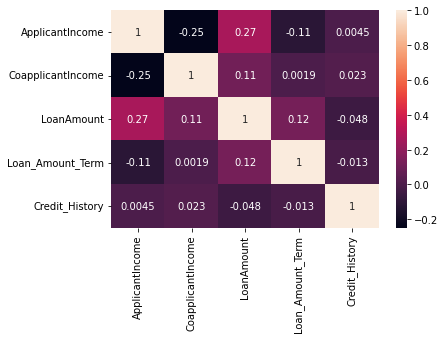

In [11]:
r=df.corr()
sns.heatmap(r,annot=True)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
encoder = LabelEncoder()
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,2,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,0,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,0,Y


In [15]:
np.unique(df['Property_Area'])

array([0, 1, 2])

In [16]:
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(381, 5)
(381,)
(112, 5)
(112,)
(38, 5)
(38,)


In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

ValueError: ignored

In [18]:
print(accuracy_score(train_y, train_labels)*100)
print(accuracy_score(test_labels, test_y)*100)

NameError: ignored

In [22]:
print(classification_report(train_y, train_labels))

NameError: ignored